# **National parks in the USA and biodiversity data analysis**
## For this analysis two csv files will be used: `observations.csv` and `species.csv` provided by Codecademy.com, with data from National Parks Service about endangered species in different parks.
***
### `observations.csv` contains recorded sightings of different species at several national parks in the US for the past 7 days.
### `species.csv` contains data about different species and their conservation status.
***
<br>

### The following questions will be answered by performing a descriptive and exploratory data analysis:
1. What is the distribution of *conservation_status* for the species?
2. Are certain types of species more likely to be endangered?
3. Are the differences between animals and their conservation status significant?
4. Which species were spotted the most at each park?
5. Which animals with the 'endangered' status were spotted the most at each park?

# *Dataset exploration*

In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

obs = pd.read_csv('observations.csv')
spe = pd.read_csv('species_info.csv')

### *Species dataset*
 Columns:
- **category**: class of animal

- **scientific_name**: the scientific name of each species

- **common_name**: the common names of each species

- **conservation_status**: each species’ current conservation status

In [354]:
print(f'\nNumber of (rows, columns) in species dataset: {spe.shape}\n')
display(spe.head())
print(spe.info())


Number of (rows, columns) in species dataset: (5824, 4)



,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [355]:
print(f'\nNull values:\n{spe.isna().sum()}\n')
print(f'Number of duplicate rows: {spe.duplicated().sum()}')
print(f'Duplicates in scientific_name column: {spe.duplicated(subset="scientific_name").sum()}')
print(f'\nTypes of animals: {spe.category.unique()}\n')
print(f'Different number of species: {spe.scientific_name.nunique()}\n')
print(f'Conservation status categories: {spe.conservation_status.unique()}')


Null values:
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

Number of duplicate rows: 0
Duplicates in scientific_name column: 283

Types of animals: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

Different number of species: 5541

Conservation status categories: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


#### There are **5633 null values** in the conservation status. Since this column holds a value if a species has a registered conservation status, it is assumed that no value means it is safe from danger. There are **no duplicate rows**. The **283 duplicate values** in scientific name will be handled later when needed. The NaN conservation status most likely means that the species is safe from danger.
#### There are **7 types of animals** in the parks: 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant'.
#### There are **5541 different species** in the parks.

In [356]:
# cleaning the common_names so that the cells hold only one name
spe.common_names = spe.common_names.apply(lambda x: x.split(', '))
spe.common_names = spe.common_names.apply(lambda x: x[0])

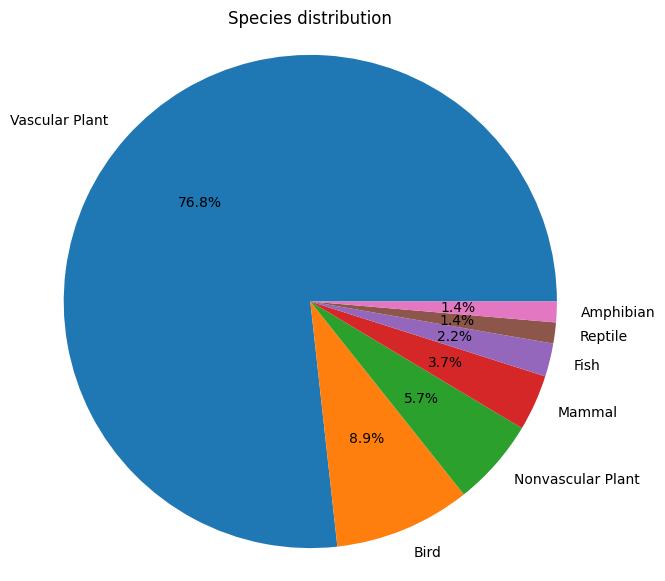

In [357]:
plt.figure(figsize=(7,7))
plt.pie(x=spe.category.value_counts(), labels=['Vascular Plant', 'Bird', 'Nonvascular Plant', 'Mammal' ,'Fish' ,'Reptile',
 'Amphibian'], autopct='%0.1f%%')
plt.axis('equal')
plt.title('Species distribution')
plt.show()

### *Observations Dataset*
Columns:
- **scientific_name**: the scientific name of each species

- **park_name**: Park where species were found

- **observations**: the number of times each species was observed at park


In [358]:
print(f'\nNumber of (rows, columns) in observations dataset: {obs.shape}\n')
display(obs.head())
print(obs.info())


Number of (rows, columns) in observations dataset: (23296, 3)



,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [359]:
print(f'\nNull values:\n{obs.isna().sum()}')
print(f'\nNumber of duplicate rows: {obs.duplicated().sum()}\n')
print(f'The parks in this dataset are: {obs.park_name.unique()}\n')
print(f'There are a total of {obs.observations.sum()} observations across the parks')


Null values:
scientific_name    0
park_name          0
observations       0
dtype: int64

Number of duplicate rows: 15

The parks in this dataset are: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']

There are a total of 3314739 observations across the parks


#### There is a total of **4 parks**.
#### There are **15 duplicate rows** but since it is possible for a species to have the same number of observations in the same park more than once, they are kept.

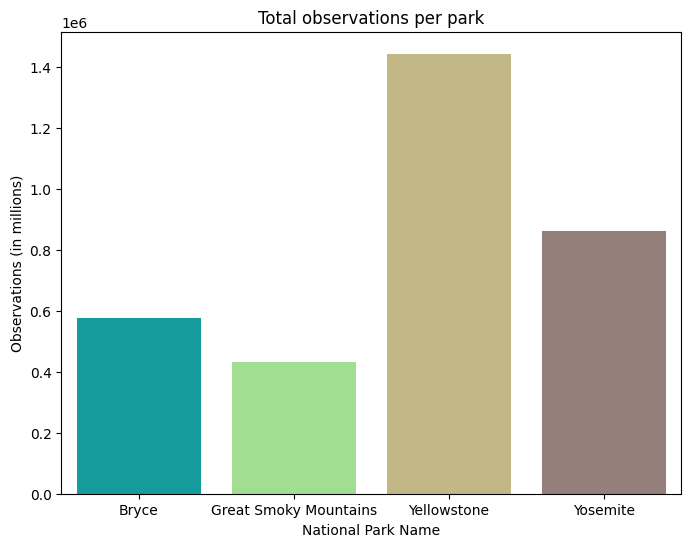

In [360]:
plt.figure(figsize=(8,6))
sns.barplot(x=['Bryce','Great Smoky Mountains','Yellowstone','Yosemite'],
            y=obs.groupby('park_name').observations.sum(), palette='terrain')
plt.title('Total observations per park')
plt.ylabel('Observations (in millions)')
plt.xlabel('National Park Name')
plt.show()

# *Data Analysis*

### The distribution of `conservation_status` among the species that are considered unsafe is displayed in the form of bar charts below:

In [361]:
# removing duplicate values
spe.drop_duplicates(subset='scientific_name', inplace=True)

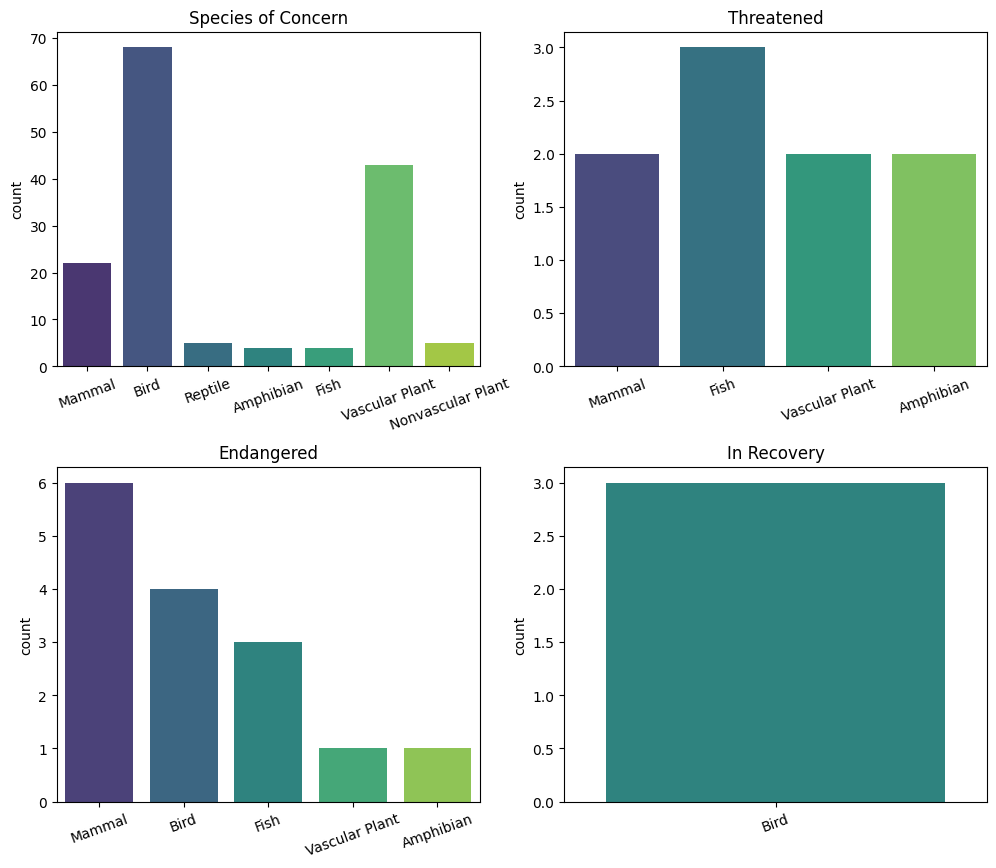

In [362]:
plt.figure(figsize=(12,10))
def plots(x_data, title, loc):
    plt.subplot(2, 2, loc)
    sns.countplot(x=x_data, palette='viridis')
    plt.title(title)
    plt.xlabel('')
    plt.xticks(fontsize=10, rotation=20)
    plt.subplots_adjust(hspace=0.3) 
    if loc == 4:
        plt.show()       

plots(spe.category[spe.conservation_status=='Species of Concern'], 'Species of Concern', 1)
plots(spe.category[spe.conservation_status=='Threatened'], 'Threatened', 2)
plots(spe.category[spe.conservation_status=='Endangered'], 'Endangered', 3)
plots(spe.category[spe.conservation_status=='In Recovery'], 'In Recovery', 4)

### The next step is to find which species are more likely to be endangered.

In [363]:
# fill empty cells in conservation_status with 'Safe'
spe.fillna('Safe', inplace=True)
# add new column with boolean values depending on if the species has a conservation status
spe['is_safe'] = spe.conservation_status=='Safe'

#species-is_safe crosstab
risk_tab = pd.crosstab(spe.category, spe.is_safe).reset_index()
risk_tab.columns= ['category','Not Safe', 'Safe']
risk_tab['Total'] = risk_tab.apply(lambda row: row['Not Safe'] + row['Safe'], axis=1)
risk_tab['% Not Safe'] = risk_tab.apply(lambda row: row['Not Safe'] / row['Total']*100, axis=1)
display(risk_tab)

,category,Not Safe,Safe,Total,% Not Safe
0,Amphibian,7,72,79,8.860759
1,Bird,75,413,488,15.368852
2,Fish,10,115,125,8.000000
3,Mammal,30,146,176,17.045455
4,Nonvascular Plant,5,328,333,1.501502
5,Reptile,5,73,78,6.410256
6,Vascular Plant,46,4216,4262,1.079305


#### Looking at the table above, 17% of the Mammals and 15% of the Birds are not safe. That means they have a higher risk of becoming endangered. The rest of the species have much lower risk.


### Next, some chi-square tests will be run to check if the difference of conservation status between animals has a statistical significance. The significance level will be 0.05 .
#### **If *p-value* is equal or less than 0.05 then there is a statistical significance**.

In [364]:
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(spe.category,spe.is_safe)
display(crosstab)

is_safe,False,True
category,,
Amphibian,7,72
Bird,75,413
Fish,10,115
Mammal,30,146
Nonvascular Plant,5,328
Reptile,5,73
Vascular Plant,46,4216


In [365]:
# Mammal-Reptile pair
mammal_reptile = pd.crosstab(spe.category[(spe.category=='Mammal') | (spe.category=='Reptile')], \
                      spe.is_safe[(spe.category=='Mammal') | (spe.category=='Reptile')])
display(mammal_reptile)
print(chi2_contingency(mammal_reptile))

is_safe,False,True
category,,
Mammal,30,146
Reptile,5,73


Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))


#### With a p-value of 0.03 there is a `statistically significant difference between mammals, reptiles` and their conservation status.

In [366]:
# Mammal-Bird pair
mammal_bird = pd.crosstab(spe.category[(spe.category=='Mammal') | (spe.category=='Bird')], \
                      spe.is_safe[(spe.category=='Mammal') | (spe.category=='Bird')])
display(mammal_bird)
print(chi2_contingency(mammal_bird))

is_safe,False,True
category,,
Bird,75,413
Mammal,30,146


Chi2ContingencyResult(statistic=0.16170148316545574, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 77.1686747, 410.8313253],
       [ 27.8313253, 148.1686747]]))


#### With a p-value of 0.68 there is `no statistically significant difference between mammals, birds` and their conservation status.

In [367]:
# Amphibian-Fish pair
amphibian_fish = pd.crosstab(spe.category[(spe.category=='Amphibian') | (spe.category=='Fish')], \
                      spe.is_safe[(spe.category=='Amphibian') | (spe.category=='Fish')])
display(amphibian_fish)
print(chi2_contingency(amphibian_fish))

is_safe,False,True
category,,
Amphibian,7,72
Fish,10,115


Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[  6.58333333,  72.41666667],
       [ 10.41666667, 114.58333333]]))


#### With a p-value of 1 there is `no statistically significant difference between aphibians, fish` and their conservation status.

In [368]:
# Bird-Fish pair
bird_fish = pd.crosstab(spe.category[(spe.category=='Bird') | (spe.category=='Fish')], \
                      spe.is_safe[(spe.category=='Bird') | (spe.category=='Fish')])
display(bird_fish)
print(chi2_contingency(bird_fish))

is_safe,False,True
category,,
Bird,75,413
Fish,10,115


Chi2ContingencyResult(statistic=3.92821121140893, pvalue=0.047482425302318096, dof=1, expected_freq=array([[ 67.66721044, 420.33278956],
       [ 17.33278956, 107.66721044]]))


#### With a p-value of 0.047 there is a `statistically significant difference between birds, fish` and their conservation status.

### Next, the most observed species per park will be presented below:

In [369]:
# merged the two tables
spe_obs = pd.merge(spe, obs, how='inner')

In [370]:
# find the most observed species per park
grouped = spe_obs.groupby(['park_name', 'common_names']).observations.sum().sort_values(ascending=False).reset_index()

display(grouped[grouped.park_name=='Bryce National Park'].head(1))
display(grouped[grouped.park_name=='Yellowstone National Park'].head(1))
display(grouped[grouped.park_name=='Great Smoky Mountains National Park'].head(1))
display(grouped[grouped.park_name=='Yosemite National Park'].head(1))

,park_name,common_names,observations
21,Bryce National Park,A Sedge,1011


,park_name,common_names,observations
0,Yellowstone National Park,A Sedge,2464


,park_name,common_names,observations
36,Great Smoky Mountains National Park,A Sedge,817


,park_name,common_names,observations
4,Yosemite National Park,A Sedge,1551


#### As expected the most observed species were plants.
#### Now the plants will be filtered out:

In [371]:
spe_obs_filter1 = spe_obs[~(spe_obs.category=='Vascular Plant') & ~(spe_obs.category=='Nonvascular Plant')]
spe_obs_filter1 = spe_obs_filter1.groupby(['park_name', 'common_names']).observations.sum().sort_values(ascending=False) \
                                                                                                         .reset_index()

display(spe_obs_filter1[spe_obs_filter1.park_name=='Bryce National Park'].head(1))
display(spe_obs_filter1[spe_obs_filter1.park_name=='Yellowstone National Park'].head(1))
display(spe_obs_filter1[spe_obs_filter1.park_name=='Great Smoky Mountains National Park'].head(1))
display(spe_obs_filter1[spe_obs_filter1.park_name=='Yosemite National Park'].head(1))

,park_name,common_names,observations
131,Bryce National Park,Rock Dove,339


,park_name,common_names,observations
0,Yellowstone National Park,Eurasian Collared-Dove,771


,park_name,common_names,observations
418,Great Smoky Mountains National Park,Uinta Chipmunk,261


,park_name,common_names,observations
50,Yosemite National Park,American Beaver,501


#### The Rock Dove, Eurasian Collared-Dove, Uinta Chipmunk and American Beaver top the charts.

### The final step is to filter the data and find the top 3 endangered animals per park.

In [372]:
# filter only endangered
spe_obs_filter2 = spe_obs[spe_obs.conservation_status=='Endangered']
spe_obs_filter2 = spe_obs_filter2.groupby(['park_name', 'common_names']).observations.sum().sort_values(ascending=False) \
                                                                                                             .reset_index()
t1 = spe_obs_filter2[spe_obs_filter2.park_name=='Bryce National Park'].reset_index(drop=True)
display(t1.head(3))

t2 = spe_obs_filter2[spe_obs_filter2.park_name=='Yellowstone National Park'].reset_index(drop=True)
display(t2.head(3))

t3 = spe_obs_filter2[spe_obs_filter2.park_name=='Great Smoky Mountains National Park'].reset_index(drop=True)
display(t3.head(3))

t4 = spe_obs_filter2[spe_obs_filter2.park_name=='Yosemite National Park'].reset_index(drop=True)
display(t4.head(3))

,park_name,common_names,observations
0,Bryce National Park,Gray Wolf,130
1,Bryce National Park,Sierra Nevada Yellow-Legged Frog,31
2,Bryce National Park,California Condor,30


,park_name,common_names,observations
0,Yellowstone National Park,Gray Wolf,330
1,Yellowstone National Park,Duskytail Darter,70
2,Yellowstone National Park,Gray Myotis,68


,park_name,common_names,observations
0,Great Smoky Mountains National Park,Gray Wolf,59
1,Great Smoky Mountains National Park,Duskytail Darter,31
2,Great Smoky Mountains National Park,Mountain Avens,27


,park_name,common_names,observations
0,Yosemite National Park,Gray Wolf,196
1,Yosemite National Park,California Condor,47
2,Yosemite National Park,Mountain Avens,47


#### The data above indicates that the `Gray wolf is the most observed endangered` animal of all.

#### The data is demonstrated in bar charts below:

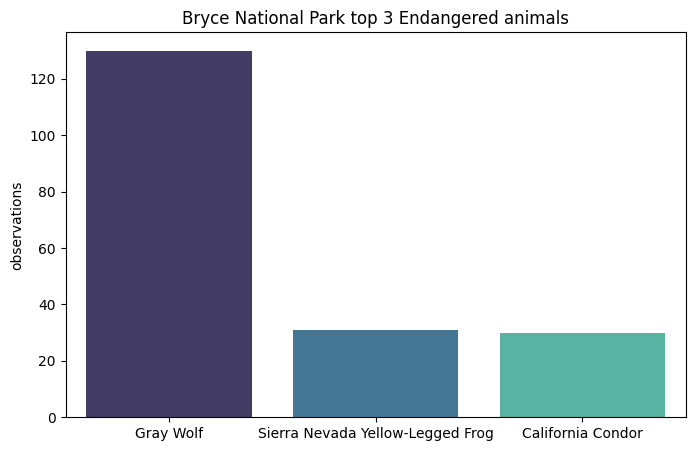

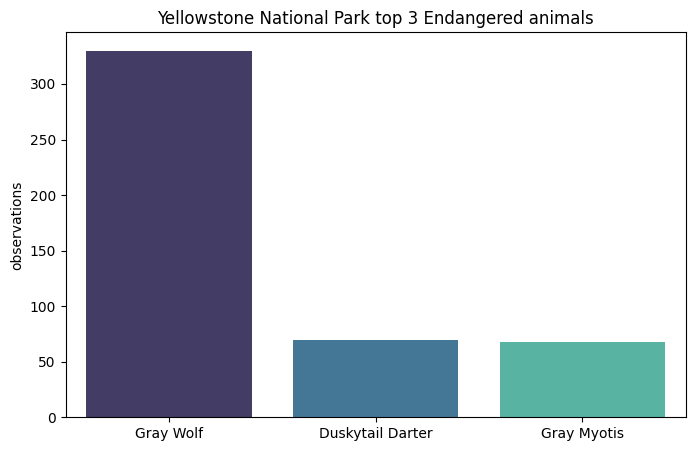

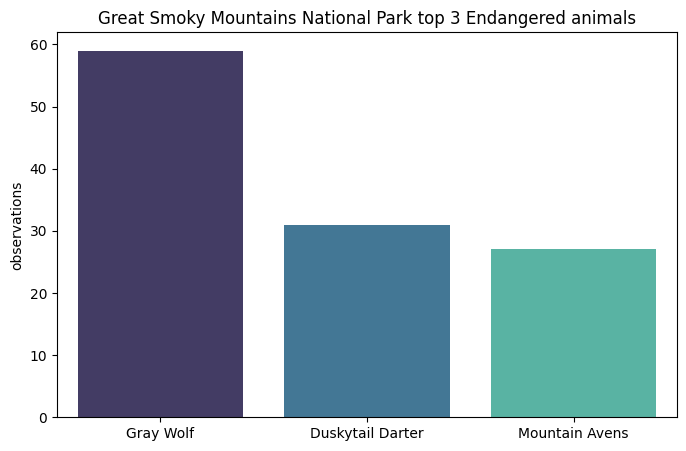

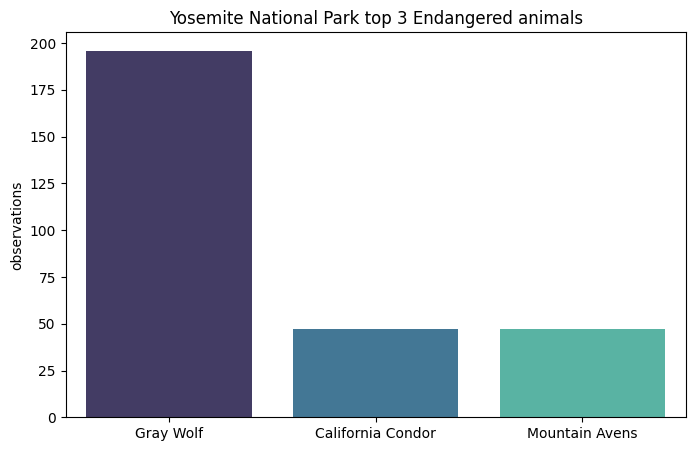

In [373]:
def plots2(x_data, y_data, title):
    plt.figure(figsize=(8,5))
    sns.barplot(x=x_data, y=y_data, palette='mako')
    plt.title(title)
    plt.xlabel('')
    plt.xticks(fontsize=10,rotation=0)
    plt.show()

plots2(t1.common_names[0:3],t1.observations[0:3],'Bryce National Park top 3 Endangered animals')
plots2(t2.common_names[0:3],t2.observations[0:3],'Yellowstone National Park top 3 Endangered animals')
plots2(t3.common_names[0:3],t3.observations[0:3],'Great Smoky Mountains National Park top 3 Endangered animals')
plots2(t4.common_names[0:3],t4.observations[0:3],'Yosemite National Park top 3 Endangered animals')

# *Conclusions*

### Some very useful information was gathered after performing this analysis. The USA has national parks with a diverse wildlife but some of the species have a risk of becoming extinct. Birds and Mammals are the most endangered species, with Yellowstone park having the highest number of those animals. From all the animals the Gray Wolf has the most observations as an endangered species. The causes of the species becoming endangered are out of the scope of this analysis and a could be a future subject for a causal analysis.